In [62]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [63]:
adult_data = pd.read_csv(r"C:\Users\ASUS\Desktop\Machine Learning\Income-Prediction-Project\adult\adult.data", header=None)

In [64]:
# Open the file for reading
with open(r"C:\Users\ASUS\Desktop\Machine Learning\Income-Prediction-Project\adult\adult.test", "r") as file:
    lines = file.readlines()  

# Remove the first line
lines = lines[1:]

# Open the file for writing
with open(r"C:\Users\ASUS\Desktop\Machine Learning\Income-Prediction-Project\adult\adult_fixed.test", "w") as file:
    file.writelines(lines) 

In [65]:
adult_test = pd.read_csv(r"C:\Users\ASUS\Desktop\Machine Learning\Income-Prediction-Project\adult\adult.test", header=None)

In [66]:
df = pd.concat([adult_data,adult_test])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16276,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16277,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16278,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


# Cleaning and Preprocessing

In [67]:
# Define column names
column_names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race', 'sex','capital-gain','capital-loss','hours-per-week','native-country','income']
df.columns = column_names
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16276,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16277,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16278,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [68]:
df.shape

(48841, 15)

In [69]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48841.000000,4.884100e+04,48841.000000,48841.000000,48841.000000,48841.000000
mean,38.643865,1.896634e+05,10.078152,1079.089720,87.504105,40.422391
std,13.710511,1.056050e+05,2.570961,7452.093748,403.008483,12.391571
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175490e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781420e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376460e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [70]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [71]:
# Checcking unique valus incolumns

In [72]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")
    print()

Unique values in column 'age': [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]

Unique values in column 'workclass': [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

Unique values in column 'fnlwgt': [ 77516  83311 215646 ... 173449  89686 350977]

Unique values in column 'education': [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Unique values in column 'education-num': [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Unique values in column 'marital-status': [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

Unique va

In [73]:
# Replace the "?" mark with "NaN" for dropping columns

In [74]:
df['workclass'].replace(" ?", pd.NA, inplace = True)
df['occupation'].replace(" ?", pd.NA, inplace = True)
df['native-country'].replace(" ?", pd.NA, inplace = True)


In [75]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [76]:
df = df.dropna(subset=['workclass'])
df = df.dropna(subset=['occupation'])
df = df.dropna(subset=['native-country'])



In [77]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [78]:
df.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [79]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [80]:
df['income'].replace(' <=50K.', ' <=50K', inplace=True)
df['income'].replace(' >50K.', ' >50K', inplace=True)

In [81]:
df.income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [82]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16274,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
16275,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
16277,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
16278,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [83]:
df.drop_duplicates()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16274,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
16275,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
16277,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
16278,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [84]:
# Calculate the mean of non-zero capital-gain values
non_zero_capital_gain = df[df['capital-gain'] != 0]['capital-gain']
non_zero_capital_gain_mean = non_zero_capital_gain.median()

# Replace zero values with the mean of non-zero capital-gain values
df['capital-gain'].replace(0, non_zero_capital_gain_mean, inplace=True)
df


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7298,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,7298,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,7298,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,7298,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16274,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,7298,0,40,United-States,<=50K
16275,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,7298,0,36,United-States,<=50K
16277,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,7298,0,50,United-States,<=50K
16278,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [85]:
# Calculate the mean of non-zero capital-loss values
non_zero_capital_loss = df[df['capital-loss'] != 0]['capital-loss']
non_zero_capital_loss_mean = non_zero_capital_loss.mean()

# Replace zero values with the mean of non-zero capital-loss values
df['capital-loss'].replace(0, non_zero_capital_loss_mean, inplace=True)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,1872.178505,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7298,1872.178505,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,7298,1872.178505,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,7298,1872.178505,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,7298,1872.178505,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16274,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,7298,1872.178505,40,United-States,<=50K
16275,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,7298,1872.178505,36,United-States,<=50K
16277,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,7298,1872.178505,50,United-States,<=50K
16278,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,1872.178505,40,United-States,<=50K


# Data visualization

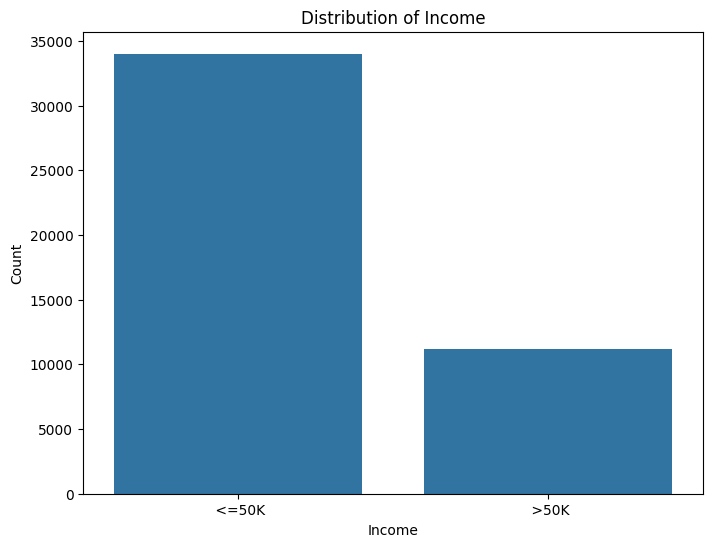

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot for 'income'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='income')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()


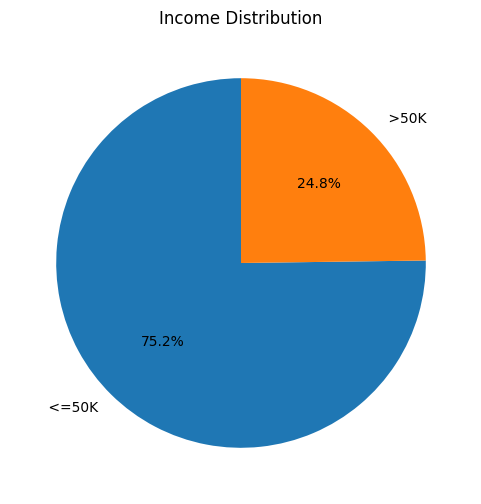

In [87]:
# Pie chart for 'income'
plt.figure(figsize=(6, 6))
df['income'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Income Distribution')
plt.ylabel('')
plt.show()


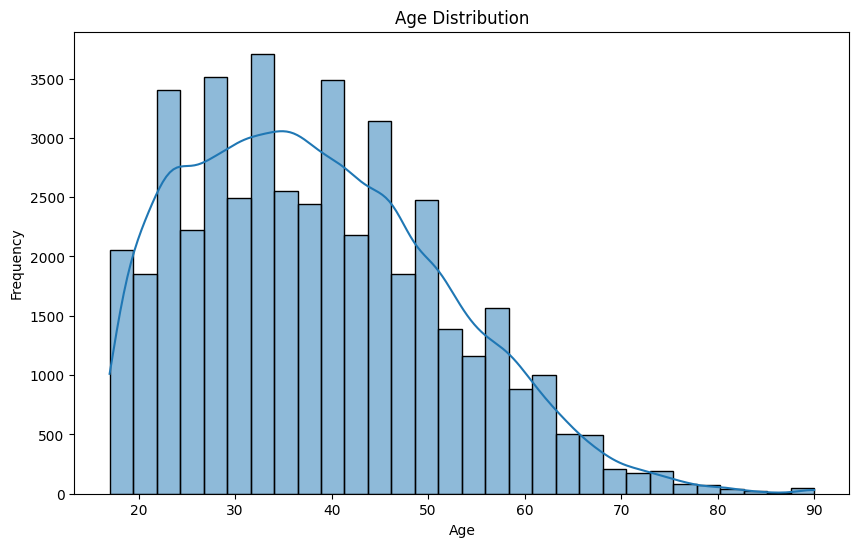

In [88]:
# Histogram for 'age'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


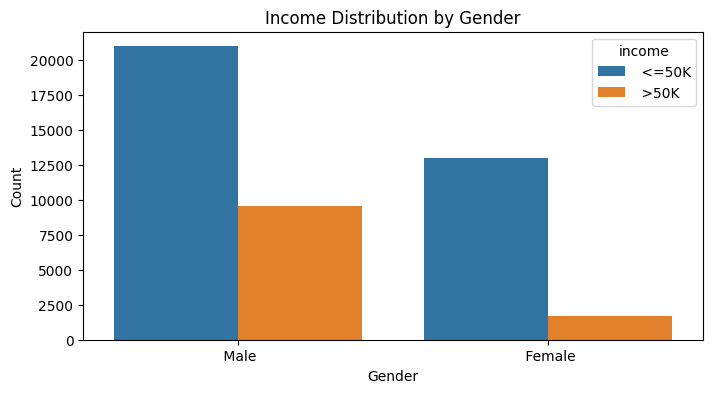

In [89]:
# Bar plot for 'sex' vs 'income'
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='sex', hue='income')
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


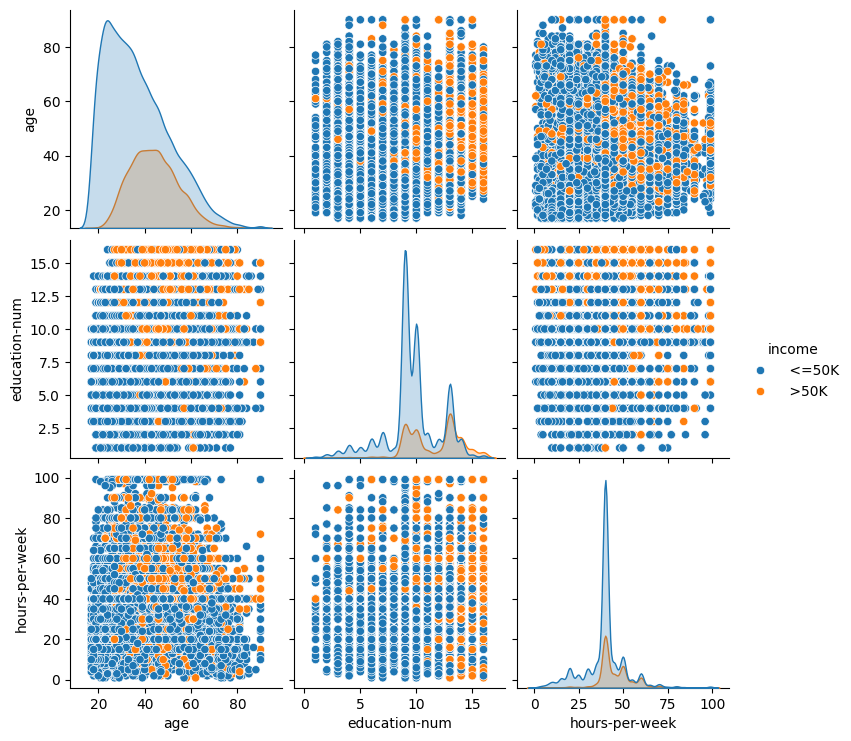

In [90]:
# Pairplot for selected features
sns.pairplot(df[['age', 'education-num', 'hours-per-week', 'income']], hue='income', diag_kind='kde')
plt.show()


# Outlier Handlling

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

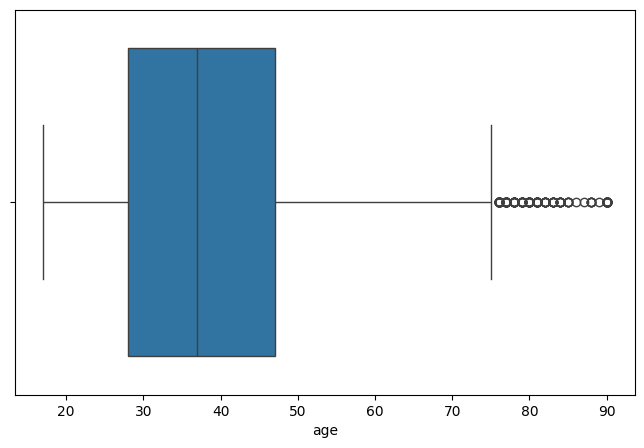

In [92]:
plt.figure(figsize = (8,5))
sns.boxplot(x = df.age)
plt.show()

In [93]:
min_thresold = df['age'].quantile(0.01)
max_thresold = df['age'].quantile(0.99)
min_thresold, max_thresold

(17.0, 73.0)

In [94]:
mean_age = df.loc[df['age']<max_thresold, "age"].mean()
df.loc[df['age']>max_thresold, "age"] = mean_age

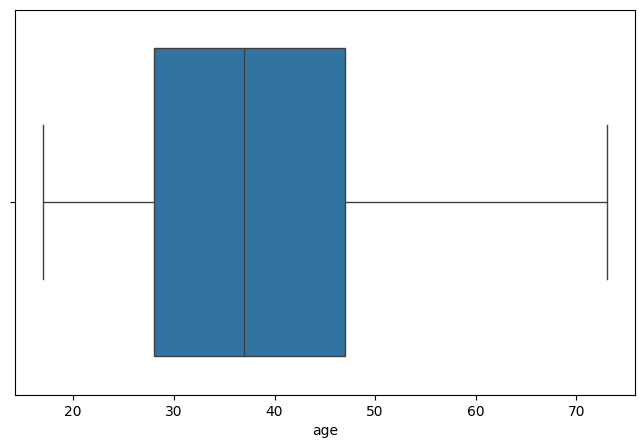

In [95]:
plt.figure(figsize = (8,5))
sns.boxplot(x = df.age)
plt.show()

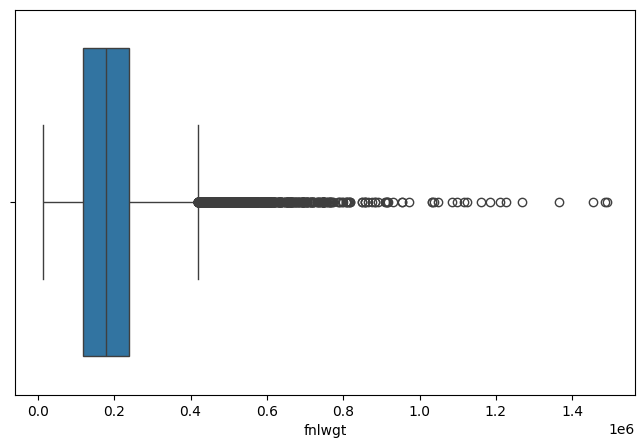

In [96]:
plt.figure(figsize = (8,5))
sns.boxplot(x = df.fnlwgt)
plt.show()

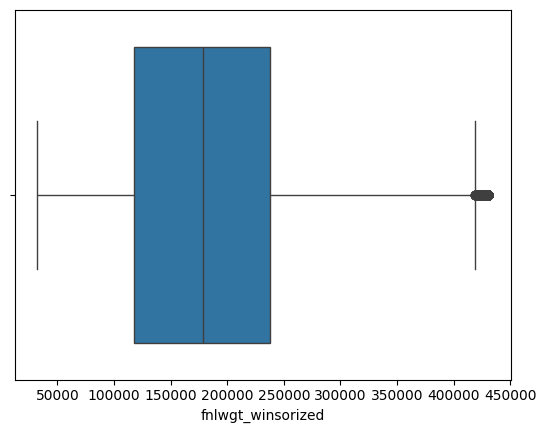

In [97]:
import numpy as np
import scipy.stats.mstats as stats

df['fnlwgt_winsorized'] = stats.winsorize(df['fnlwgt'], (0.025, 0.025))
sns.boxplot(x = df['fnlwgt_winsorized'])
plt.show()


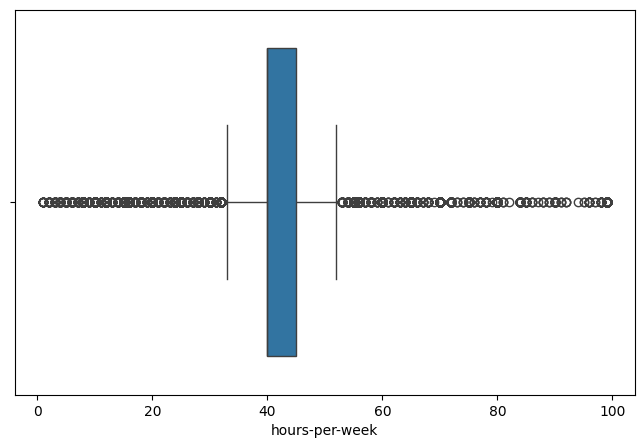

In [98]:
plt.figure(figsize = (8,5))
sns.boxplot(x = df['hours-per-week'])
plt.show()

In [99]:
lower_bound = 0
upper_bound = 90
# Apply Winsorization to replace outliers
df['hours-per-week'] = np.where(df['hours-per-week'] < lower_bound, lower_bound, df['hours-per-week'])
df['hours-per-week'] = np.where(df['hours-per-week'] > upper_bound, upper_bound,df['hours-per-week'])

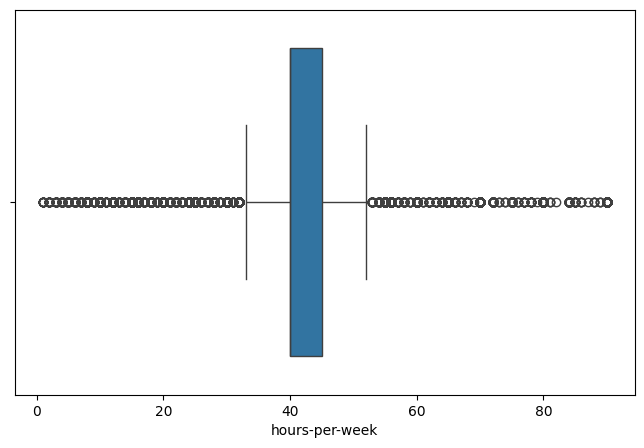

In [100]:
plt.figure(figsize = (8,5))
sns.boxplot(x = df['hours-per-week'])
plt.show()

Value: 114, Frequency: 8
Value: 401, Frequency: 2
Value: 594, Frequency: 42
Value: 914, Frequency: 10
Value: 991, Frequency: 4
Value: 1055, Frequency: 31
Value: 1086, Frequency: 5
Value: 1151, Frequency: 13
Value: 1173, Frequency: 2
Value: 1264, Frequency: 2
Value: 1409, Frequency: 5
Value: 1424, Frequency: 4
Value: 1455, Frequency: 3
Value: 1471, Frequency: 9
Value: 1506, Frequency: 23
Value: 1639, Frequency: 1
Value: 1731, Frequency: 1
Value: 1797, Frequency: 8
Value: 1831, Frequency: 9
Value: 1848, Frequency: 8
Value: 2009, Frequency: 2
Value: 2036, Frequency: 5
Value: 2050, Frequency: 3
Value: 2062, Frequency: 3
Value: 2105, Frequency: 11
Value: 2174, Frequency: 72
Value: 2176, Frequency: 28
Value: 2202, Frequency: 27
Value: 2228, Frequency: 3
Value: 2290, Frequency: 8
Value: 2329, Frequency: 5
Value: 2346, Frequency: 5
Value: 2354, Frequency: 20
Value: 2387, Frequency: 1
Value: 2407, Frequency: 23
Value: 2414, Frequency: 7
Value: 2463, Frequency: 15
Value: 2538, Frequency: 4
Value

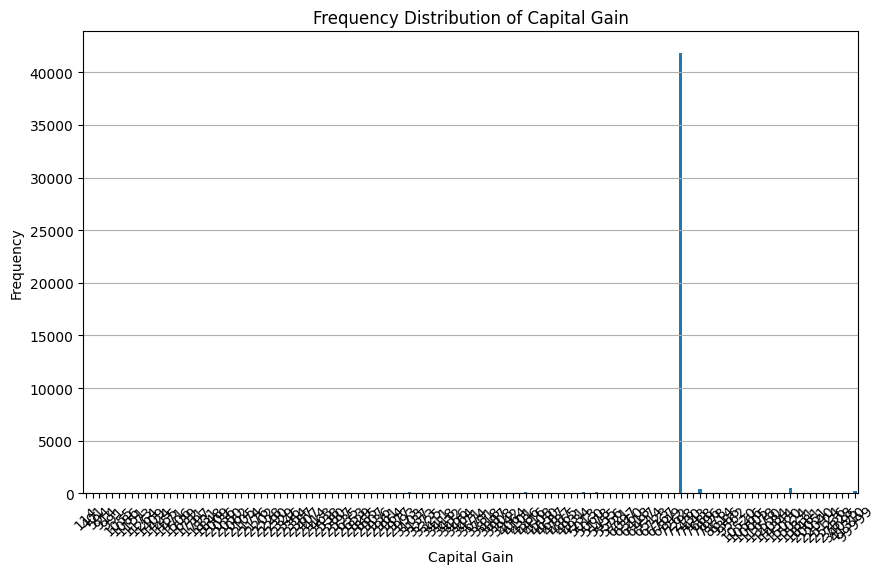

In [101]:
frequency = df['capital-gain'].value_counts()

# Sort the frequency 
frequency_sorted = frequency.sort_index()

for value, freq in frequency_sorted.items():
    print(f"Value: {value}, Frequency: {freq}")




import matplotlib.pyplot as plt

# Plot the frequency distribution
plt.figure(figsize=(10, 6))
frequency_sorted.plot(kind='bar')
plt.title('Frequency Distribution of Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


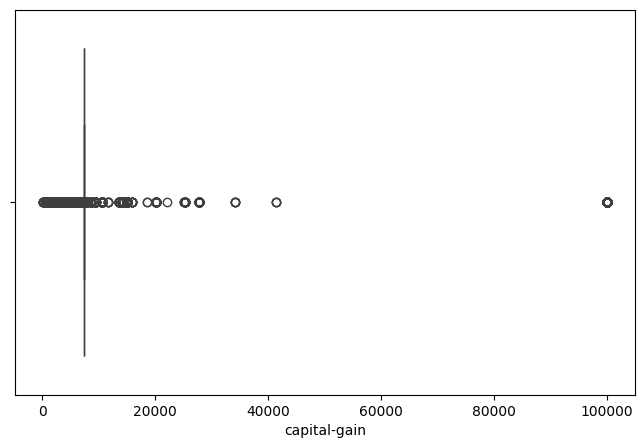

In [102]:
plt.figure(figsize = (8,5))
sns.boxplot(x = df['capital-gain'])
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

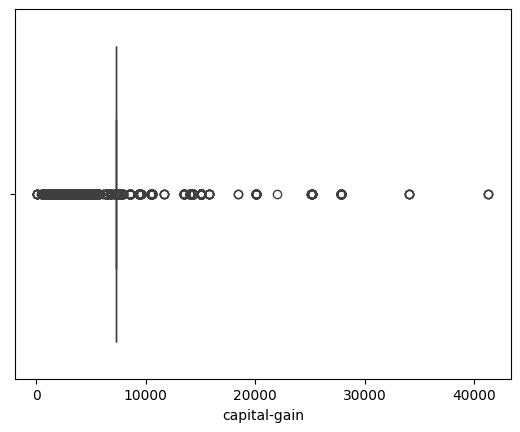

In [103]:
outlier_threshold = 99000
mean_capital_gain = df.loc[df['capital-gain']<=outlier_threshold, "capital-gain"].mean()
df.loc[df['capital-gain']>outlier_threshold, "capital-gain"] = mean_capital_gain


sns.boxplot(x = df['capital-gain'])
plt.show

In [104]:
# Outlier handling for capital-loss

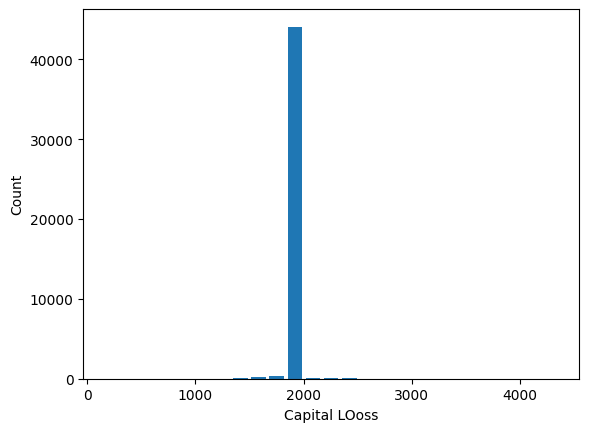

In [105]:
plt.hist(df['capital-loss'], bins=25, rwidth=0.8)
plt.xlabel('Capital LOoss')
plt.ylabel('Count')
plt.show()

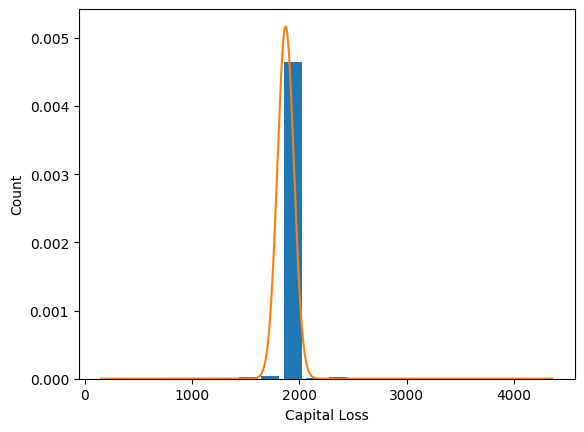

In [106]:
from scipy.stats import norm
import numpy as np

plt.hist(df['capital-loss'], bins=20, rwidth=0.8, density=True)
plt.xlabel('Capital Loss')
plt.ylabel('Count')

rng = np.arange(df['capital-loss'].min(), df['capital-loss'].max(), 0.1)
plt.plot(rng, norm.pdf(rng, df['capital-loss'].mean(), df['capital-loss'].std()))


In [107]:
upper_limit =df['capital-loss'].mean()+ 3*df['capital-loss'].std()
upper_limit

2103.9522370755685

In [108]:

lower_limit = df['capital-loss'].mean() - 3* df['capital-loss'].std()
lower_limit



1640.4047722702262

In [109]:
df[(df['capital-loss'] > upper_limit) | (df['capital-loss']< lower_limit)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,fnlwgt_winsorized
32,45.000000,Private,386940,Bachelors,13,Divorced,Exec-managerial,Own-child,White,Male,7298.0,1408.0,40,United-States,<=50K,386940
143,45.000000,Private,196584,Assoc-voc,11,Never-married,Prof-specialty,Not-in-family,White,Female,7298.0,1564.0,40,United-States,>50K,196584
148,64.000000,Private,181232,11th,7,Married-civ-spouse,Craft-repair,Husband,White,Male,7298.0,2179.0,40,United-States,<=50K,181232
203,42.000000,Local-gov,254817,Some-college,10,Never-married,Prof-specialty,Not-in-family,White,Female,7298.0,1340.0,40,United-States,<=50K,254817
222,38.139528,Private,51744,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,7298.0,2206.0,40,United-States,<=50K,51744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16071,61.000000,Private,181200,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,Male,7298.0,1564.0,40,United-States,>50K,181200
16074,30.000000,Private,316606,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,7298.0,2339.0,50,United-States,<=50K,316606
16082,54.000000,Private,317733,Doctorate,16,Widowed,Tech-support,Unmarried,White,Male,7298.0,2472.0,40,United-States,>50K,317733
16221,19.000000,Private,156618,HS-grad,9,Never-married,Other-service,Own-child,White,Female,7298.0,1602.0,20,United-States,<=50K,156618


In [110]:
df = df[(df['capital-loss'] < upper_limit) & (df['capital-loss'] > lower_limit)]

In [111]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,fnlwgt_winsorized
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,1872.178505,40,United-States,<=50K,77516
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7298.0,1872.178505,13,United-States,<=50K,83311
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,7298.0,1872.178505,40,United-States,<=50K,215646
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,7298.0,1872.178505,40,United-States,<=50K,234721
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,7298.0,1872.178505,40,Cuba,<=50K,338409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16274,33.0,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,7298.0,1872.178505,40,United-States,<=50K,245211
16275,39.0,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,7298.0,1872.178505,36,United-States,<=50K,215419
16277,38.0,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,7298.0,1872.178505,50,United-States,<=50K,374983
16278,44.0,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,1872.178505,40,United-States,<=50K,83891


# Encoding columns values for data training

In [112]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,fnlwgt_winsorized
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,1872.178505,40,United-States,<=50K,77516
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7298.0,1872.178505,13,United-States,<=50K,83311
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,7298.0,1872.178505,40,United-States,<=50K,215646
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,7298.0,1872.178505,40,United-States,<=50K,234721
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,7298.0,1872.178505,40,Cuba,<=50K,338409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16274,33.0,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,7298.0,1872.178505,40,United-States,<=50K,245211
16275,39.0,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,7298.0,1872.178505,36,United-States,<=50K,215419
16277,38.0,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,7298.0,1872.178505,50,United-States,<=50K,374983
16278,44.0,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,1872.178505,40,United-States,<=50K,83891


In [113]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["workclass"]=le.fit_transform(df["workclass"])
df["education"]=le.fit_transform(df["education"])
df["education-num"]=le.fit_transform(df["education-num"])
df["marital-status"]=le.fit_transform(df["marital-status"])
df["occupation"]=le.fit_transform(df["occupation"])
df["race"]=le.fit_transform(df["race"])
df["sex"]=le.fit_transform(df["sex"])
df["native-country"]=le.fit_transform(df["native-country"])
df["relationship"]=le.fit_transform(df["relationship"])
df["income"]=le.fit_transform(df["income"])

In [114]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,fnlwgt_winsorized
0,39.0,5,77516,9,12,4,0,1,4,1,2174.0,1872.178505,40,37,0,77516
1,50.0,4,83311,9,12,2,3,0,4,1,7298.0,1872.178505,13,37,0,83311
2,38.0,2,215646,11,8,0,5,1,4,1,7298.0,1872.178505,40,37,0,215646
3,53.0,2,234721,1,6,2,5,0,2,1,7298.0,1872.178505,40,37,0,234721
4,28.0,2,338409,9,12,2,9,5,2,0,7298.0,1872.178505,40,4,0,338409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16274,33.0,2,245211,9,12,4,9,3,4,1,7298.0,1872.178505,40,37,0,245211
16275,39.0,2,215419,9,12,0,9,1,4,0,7298.0,1872.178505,36,37,0,215419
16277,38.0,2,374983,9,12,2,9,0,4,1,7298.0,1872.178505,50,37,0,374983
16278,44.0,2,83891,9,12,0,0,3,1,1,5455.0,1872.178505,40,37,0,83891


In [115]:
df=df.drop('fnlwgt_winsorized', axis=1)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,5,77516,9,12,4,0,1,4,1,2174.0,1872.178505,40,37,0
1,50.0,4,83311,9,12,2,3,0,4,1,7298.0,1872.178505,13,37,0
2,38.0,2,215646,11,8,0,5,1,4,1,7298.0,1872.178505,40,37,0
3,53.0,2,234721,1,6,2,5,0,2,1,7298.0,1872.178505,40,37,0
4,28.0,2,338409,9,12,2,9,5,2,0,7298.0,1872.178505,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16274,33.0,2,245211,9,12,4,9,3,4,1,7298.0,1872.178505,40,37,0
16275,39.0,2,215419,9,12,0,9,1,4,0,7298.0,1872.178505,36,37,0
16277,38.0,2,374983,9,12,2,9,0,4,1,7298.0,1872.178505,50,37,0
16278,44.0,2,83891,9,12,0,0,3,1,1,5455.0,1872.178505,40,37,0


In [116]:
# save the data frame as csv file to dataset directory

In [117]:
import os

In [118]:
directory = 'dataset'
if not os.path.exists(directory):
    os.makedirs(directory)


In [119]:
csv_file_path = os.path.join(directory, 'encoded_preprocessed.csv')
df.to_csv(csv_file_path, index=False)
print(f"CSV file saved succesfully at: {csv_file_path}")

CSV file saved succesfully at: dataset\encoded_preprocessed.csv


In [120]:
df = pd.read_csv('dataset/encoded_preprocessed.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,5,77516,9,12,4,0,1,4,1,2174.0,1872.178505,40,37,0
1,50.0,4,83311,9,12,2,3,0,4,1,7298.0,1872.178505,13,37,0
2,38.0,2,215646,11,8,0,5,1,4,1,7298.0,1872.178505,40,37,0
3,53.0,2,234721,1,6,2,5,0,2,1,7298.0,1872.178505,40,37,0
4,28.0,2,338409,9,12,2,9,5,2,0,7298.0,1872.178505,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44453,33.0,2,245211,9,12,4,9,3,4,1,7298.0,1872.178505,40,37,0
44454,39.0,2,215419,9,12,0,9,1,4,0,7298.0,1872.178505,36,37,0
44455,38.0,2,374983,9,12,2,9,0,4,1,7298.0,1872.178505,50,37,0
44456,44.0,2,83891,9,12,0,0,3,1,1,5455.0,1872.178505,40,37,0


Min Max Scaling and save it as scaled_minmax_preprocessed as csv file

In [121]:
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your dataframe
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
df_minmax_scaled = pd.DataFrame(scaled, columns=df.columns)
df_minmax_scaled


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.392857,0.833333,0.043350,0.600000,0.800000,0.666667,0.000000,0.2,1.00,1.0,0.050005,0.518932,0.438202,0.948718,0.0
1,0.589286,0.666667,0.047274,0.600000,0.800000,0.333333,0.230769,0.0,1.00,1.0,0.174386,0.518932,0.134831,0.948718,0.0
2,0.375000,0.333333,0.136877,0.733333,0.533333,0.000000,0.384615,0.2,1.00,1.0,0.174386,0.518932,0.438202,0.948718,0.0
3,0.642857,0.333333,0.149792,0.066667,0.400000,0.333333,0.384615,0.0,0.50,1.0,0.174386,0.518932,0.438202,0.948718,0.0
4,0.196429,0.333333,0.219998,0.600000,0.800000,0.333333,0.692308,1.0,0.50,0.0,0.174386,0.518932,0.438202,0.102564,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44453,0.285714,0.333333,0.156895,0.600000,0.800000,0.666667,0.692308,0.6,1.00,1.0,0.174386,0.518932,0.438202,0.948718,0.0
44454,0.392857,0.333333,0.136723,0.600000,0.800000,0.000000,0.692308,0.2,1.00,0.0,0.174386,0.518932,0.393258,0.948718,0.0
44455,0.375000,0.333333,0.244762,0.600000,0.800000,0.333333,0.692308,0.0,1.00,1.0,0.174386,0.518932,0.550562,0.948718,0.0
44456,0.482143,0.333333,0.047666,0.600000,0.800000,0.000000,0.000000,0.6,0.25,1.0,0.129649,0.518932,0.438202,0.948718,0.0


In [122]:
df_minmax_scaled.to_csv('dataset/scaled_minmax_preprocessed.csv', index=False)

print("DataFrame saved successfully as 'filename.csv'")


DataFrame saved successfully as 'filename.csv'
